<a href="https://www.kaggle.com/code/ngodingai/answer-linear-regression-berat-kepiting?scriptVersionId=263153114" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crab-age-prediction/CrabAgePrediction.csv


In [2]:
df = pd.read_csv('/kaggle/input/crab-age-prediction/CrabAgePrediction.csv', usecols=['Length', 'Diameter', 'Height', 'Weight'])

In [3]:
df

,Length,Diameter,Height,Weight
0,1.4375,1.1750,0.4125,24.635715
1,0.8875,0.6500,0.2125,5.400580
2,1.0375,0.7750,0.2500,7.952035
3,1.1750,0.8875,0.2500,13.480187
4,0.8875,0.6625,0.2125,6.903103
...,...,...,...,...
3888,1.4625,1.1375,0.3250,24.819987
3889,1.5500,1.2125,0.4375,34.458817
3890,0.6250,0.4625,0.1625,2.012815
3891,1.0625,0.7750,0.2625,10.347568


# EDA

In [4]:
df.describe()

,Length,Diameter,Height,Weight
count,3893.000000,3893.000000,3893.000000,3893.000000
mean,1.311306,1.020893,0.349374,23.567275
std,0.300431,0.248233,0.104976,13.891201
min,0.187500,0.137500,0.000000,0.056699
25%,1.125000,0.875000,0.287500,12.672227
50%,1.362500,1.062500,0.362500,22.792998
75%,1.537500,1.200000,0.412500,32.786197
max,2.037500,1.625000,2.825000,80.101512


In [5]:
df.isna().sum()

Length      0
Diameter    0
Height      0
Weight      0
dtype: int64

<Axes: >

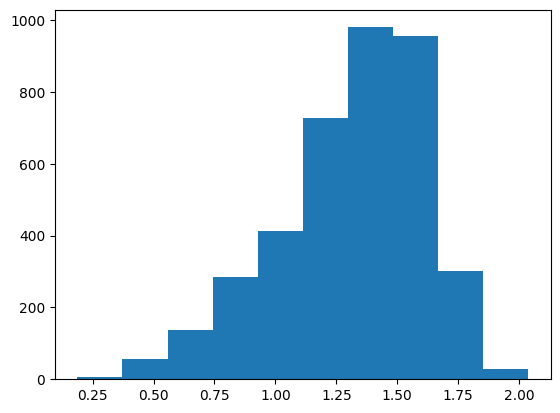

In [6]:
df['Length'].hist(grid=False)

<Axes: >

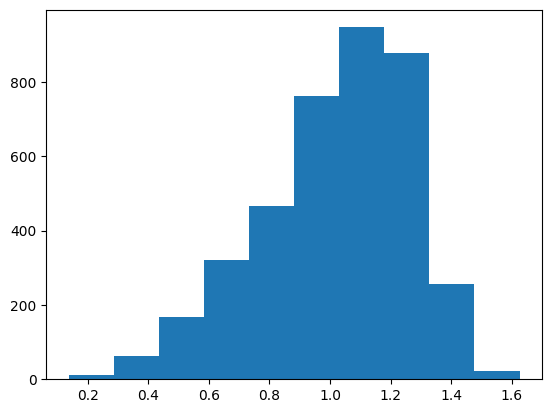

In [7]:
df['Diameter'].hist(grid=False)

<Axes: >

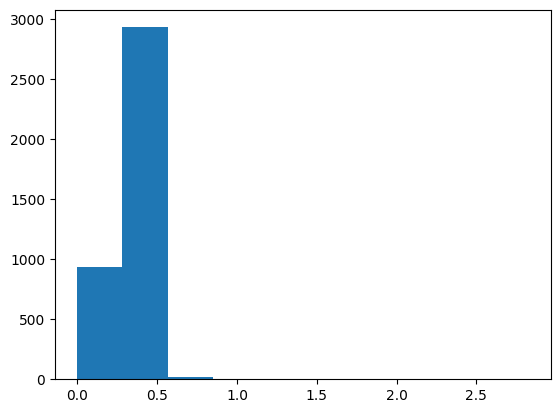

In [8]:
df['Height'].hist(grid=False)

<Axes: >

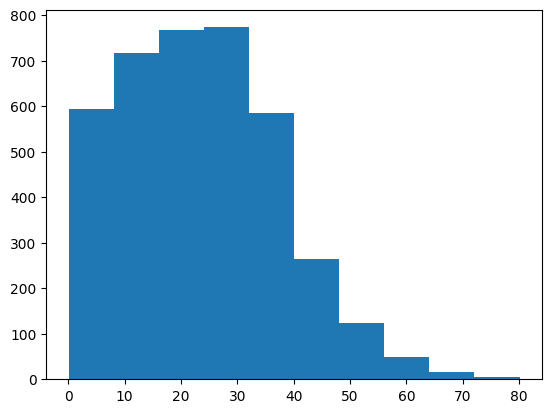

In [9]:
df['Weight'].hist(grid=False)

In [10]:
df['Weight_log'] = np.log(df['Weight'])

<Axes: >

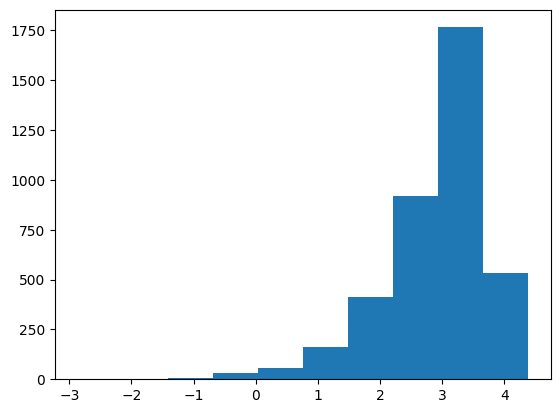

In [11]:
df['Weight_log'].hist(grid=False)

In [12]:
df.corr()

,Length,Diameter,Height,Weight,Weight_log
Length,1.000000,0.986653,0.823081,0.925374,0.966167
Diameter,0.986653,1.000000,0.829532,0.925770,0.963408
Height,0.823081,0.829532,1.000000,0.814405,0.826978
Weight,0.925374,0.925770,0.814405,1.000000,0.885401
Weight_log,0.966167,0.963408,0.826978,0.885401,1.000000


In [13]:
df['Length_log'] = np.log(df['Length'])

<Axes: xlabel='Length'>

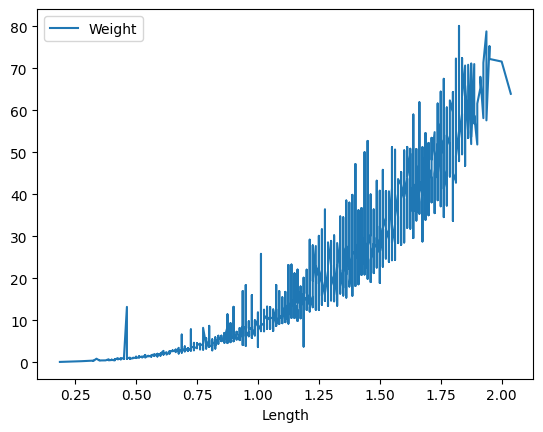

In [14]:
df.sort_values('Length').plot(x='Length', y='Weight')

<Axes: xlabel='Length_log'>

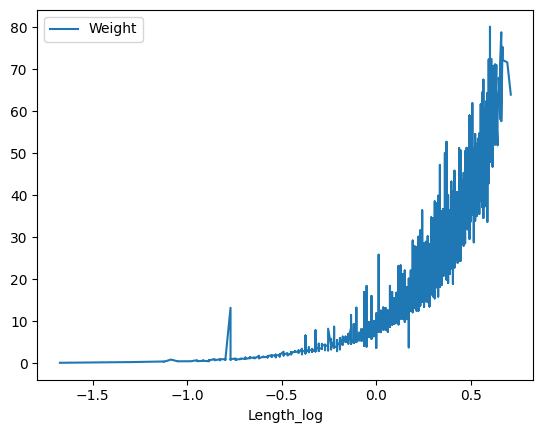

In [15]:
df.sort_values('Length_log').plot(x='Length_log', y='Weight')

# Split into Train and Test

In [16]:
df = df.reset_index()

In [17]:
df

,index,Length,Diameter,Height,Weight,Weight_log,Length_log
0,0,1.4375,1.1750,0.4125,24.635715,3.204197,0.362905
1,1,0.8875,0.6500,0.2125,5.400580,1.686506,-0.119347
2,2,1.0375,0.7750,0.2500,7.952035,2.073428,0.036814
3,3,1.1750,0.8875,0.2500,13.480187,2.601221,0.161268
4,4,0.8875,0.6625,0.2125,6.903103,1.931971,-0.119347
...,...,...,...,...,...,...,...
3888,3888,1.4625,1.1375,0.3250,24.819987,3.211649,0.380147
3889,3889,1.5500,1.2125,0.4375,34.458817,3.539765,0.438255
3890,3890,0.6250,0.4625,0.1625,2.012815,0.699534,-0.470004
3891,3891,1.0625,0.7750,0.2625,10.347568,2.336751,0.060625


In [18]:
df_train = df.sample(frac=0.7)


In [19]:
train_index = df_train['index'].values

In [20]:
df_test = df[df['index'].apply(lambda x: x not in train_index)].copy()

In [21]:
df_train

,index,Length,Diameter,Height,Weight,Weight_log,Length_log
1924,1924,0.7125,0.5625,0.1750,2.849125,1.047012,-0.338975
867,867,1.6875,1.3125,0.4375,39.745999,3.682509,0.523248
1698,1698,1.5750,1.1750,0.3875,32.105809,3.469037,0.454255
726,726,1.4875,1.1500,0.3500,28.477073,3.349099,0.397097
2331,2331,1.2250,0.9750,0.3375,16.782904,2.820361,0.202941
...,...,...,...,...,...,...,...
2261,2261,1.4750,1.1125,0.3250,32.105809,3.469037,0.388658
2145,2145,1.4375,1.1500,0.4750,28.179403,3.338591,0.362905
389,389,1.3750,1.0500,0.4000,38.002505,3.637652,0.318454
3120,3120,1.5875,1.2750,0.4250,34.685613,3.546325,0.462160


In [22]:
df_test

,index,Length,Diameter,Height,Weight,Weight_log,Length_log
1,1,0.8875,0.6500,0.2125,5.400580,1.686506,-0.119347
2,2,1.0375,0.7750,0.2500,7.952035,2.073428,0.036814
5,5,1.5500,1.1625,0.3500,28.661344,3.355549,0.438255
6,6,1.3000,1.0000,0.3250,17.704263,2.873805,0.262364
9,9,0.9125,0.6875,0.3375,6.803880,1.917493,-0.091567
...,...,...,...,...,...,...,...
3887,3887,1.7500,1.3750,0.4250,47.740558,3.865781,0.559616
3888,3888,1.4625,1.1375,0.3250,24.819987,3.211649,0.380147
3890,3890,0.6250,0.4625,0.1625,2.012815,0.699534,-0.470004
3891,3891,1.0625,0.7750,0.2625,10.347568,2.336751,0.060625


# Linear Model: Estimasi nilai Beta

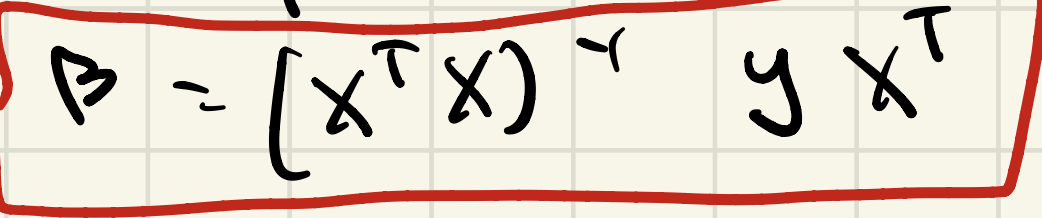

$$\beta = (X^T X)^{-1} y X^T$$

$$\hat{y} = X^T \beta$$

In [23]:
df_train['intercept'] = 1
df_test['intercept'] = 1

In [24]:
X = df_train[['intercept', 'Length']].values

In [25]:
X.shape

(2725, 2)

In [26]:
X

array([[1.    , 0.7125],
       [1.    , 1.6875],
       [1.    , 1.575 ],
       ...,
       [1.    , 1.375 ],
       [1.    , 1.5875],
       [1.    , 1.4   ]])

In [27]:
y = df_train['Weight'].values

In [28]:
y.shape

(2725,)

In [29]:
beta = np.linalg.inv(X.T@X)@ (np.dot(y.T, X))

In [30]:
beta

array([-32.85876124,  42.96344965])

$$\hat{y_i} = -32.4 + 42.6x_i$$

In [31]:
y_hat_func = lambda x: beta[0] + (beta[1] * x)

In [32]:
y_hat_func(1.5750)

34.80867196213106

In [33]:
df_train

,index,Length,Diameter,Height,Weight,Weight_log,Length_log,intercept
1924,1924,0.7125,0.5625,0.1750,2.849125,1.047012,-0.338975,1
867,867,1.6875,1.3125,0.4375,39.745999,3.682509,0.523248,1
1698,1698,1.5750,1.1750,0.3875,32.105809,3.469037,0.454255,1
726,726,1.4875,1.1500,0.3500,28.477073,3.349099,0.397097,1
2331,2331,1.2250,0.9750,0.3375,16.782904,2.820361,0.202941,1
...,...,...,...,...,...,...,...,...
2261,2261,1.4750,1.1125,0.3250,32.105809,3.469037,0.388658,1
2145,2145,1.4375,1.1500,0.4750,28.179403,3.338591,0.362905,1
389,389,1.3750,1.0500,0.4000,38.002505,3.637652,0.318454,1
3120,3120,1.5875,1.2750,0.4250,34.685613,3.546325,0.462160,1


In [34]:
np.dot(y.T, X)

array([64121.3385175 , 94377.21375676])

# Prediksi Weight

In [35]:
df_test['y_predict'] = df_test['Length'].apply(lambda x: y_hat_func(x))

In [36]:
df_train['y_predict'] = df_train['Length'].apply(lambda x: y_hat_func(x))

In [37]:
df_train

,index,Length,Diameter,Height,Weight,Weight_log,Length_log,intercept,y_predict
1924,1924,0.7125,0.5625,0.1750,2.849125,1.047012,-0.338975,1,-2.247303
867,867,1.6875,1.3125,0.4375,39.745999,3.682509,0.523248,1,39.642060
1698,1698,1.5750,1.1750,0.3875,32.105809,3.469037,0.454255,1,34.808672
726,726,1.4875,1.1500,0.3500,28.477073,3.349099,0.397097,1,31.049370
2331,2331,1.2250,0.9750,0.3375,16.782904,2.820361,0.202941,1,19.771465
...,...,...,...,...,...,...,...,...,...
2261,2261,1.4750,1.1125,0.3250,32.105809,3.469037,0.388658,1,30.512327
2145,2145,1.4375,1.1500,0.4750,28.179403,3.338591,0.362905,1,28.901198
389,389,1.3750,1.0500,0.4000,38.002505,3.637652,0.318454,1,26.215982
3120,3120,1.5875,1.2750,0.4250,34.685613,3.546325,0.462160,1,35.345715


# Hitung Error (Mean Absolute Error)

In [38]:
np.abs((df_train['Weight'] - df_train['y_predict']).values).mean()

3.874280386591224

In [39]:
np.abs((df_test['Weight'] - df_test['y_predict']).values).mean()

3.912609557764135

In [40]:
import matplotlib.pyplot as plt

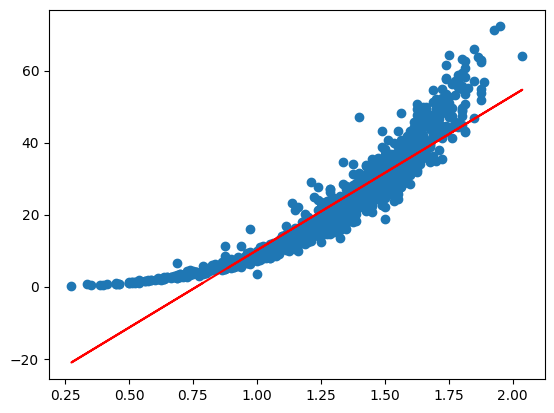

In [41]:
plt.scatter(x=df_test['Length'], y=df_test['Weight'])
plt.plot(df_test['Length'], df_test['y_predict'], color='red')
plt.show()